# Explore qflx

In [4]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_settings import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [7]:
from src.constants import OCEAN_DATA_PATH

In [8]:
import xarray as xr

In [9]:
import os

In [11]:
xr.open_dataset(os.path.join(OCEAN_DATA_PATH, "qflx.nc"), decode_times=False)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 ...

In [16]:
from src.utils import open_dataarray

In [34]:
qflx = open_dataarray(os.path.join(OCEAN_DATA_PATH, "qflx.nc"))
qflx_0 = open_dataarray(os.path.join(OCEAN_DATA_PATH, "qflx-0.nc"))
diff = qflx - qflx_0

In [23]:
import matplotlib.pyplot as plt

In [102]:
vmin, vmax = -0.0002, 0.0002

In [55]:
da = xr.concat([qflx.isel(Z=0), qflx_0.isel(Z=0), diff.isel(Z=0)], dim="flux")
da = da.assign_coords(coords={"flux": ["qflx", "qflx-0", "diff"]}).isel(variable=0).drop(labels="Z")
print(da)

<xarray.DataArray (flux: 3, T: 12, Y: 181, X: 360)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
...
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0

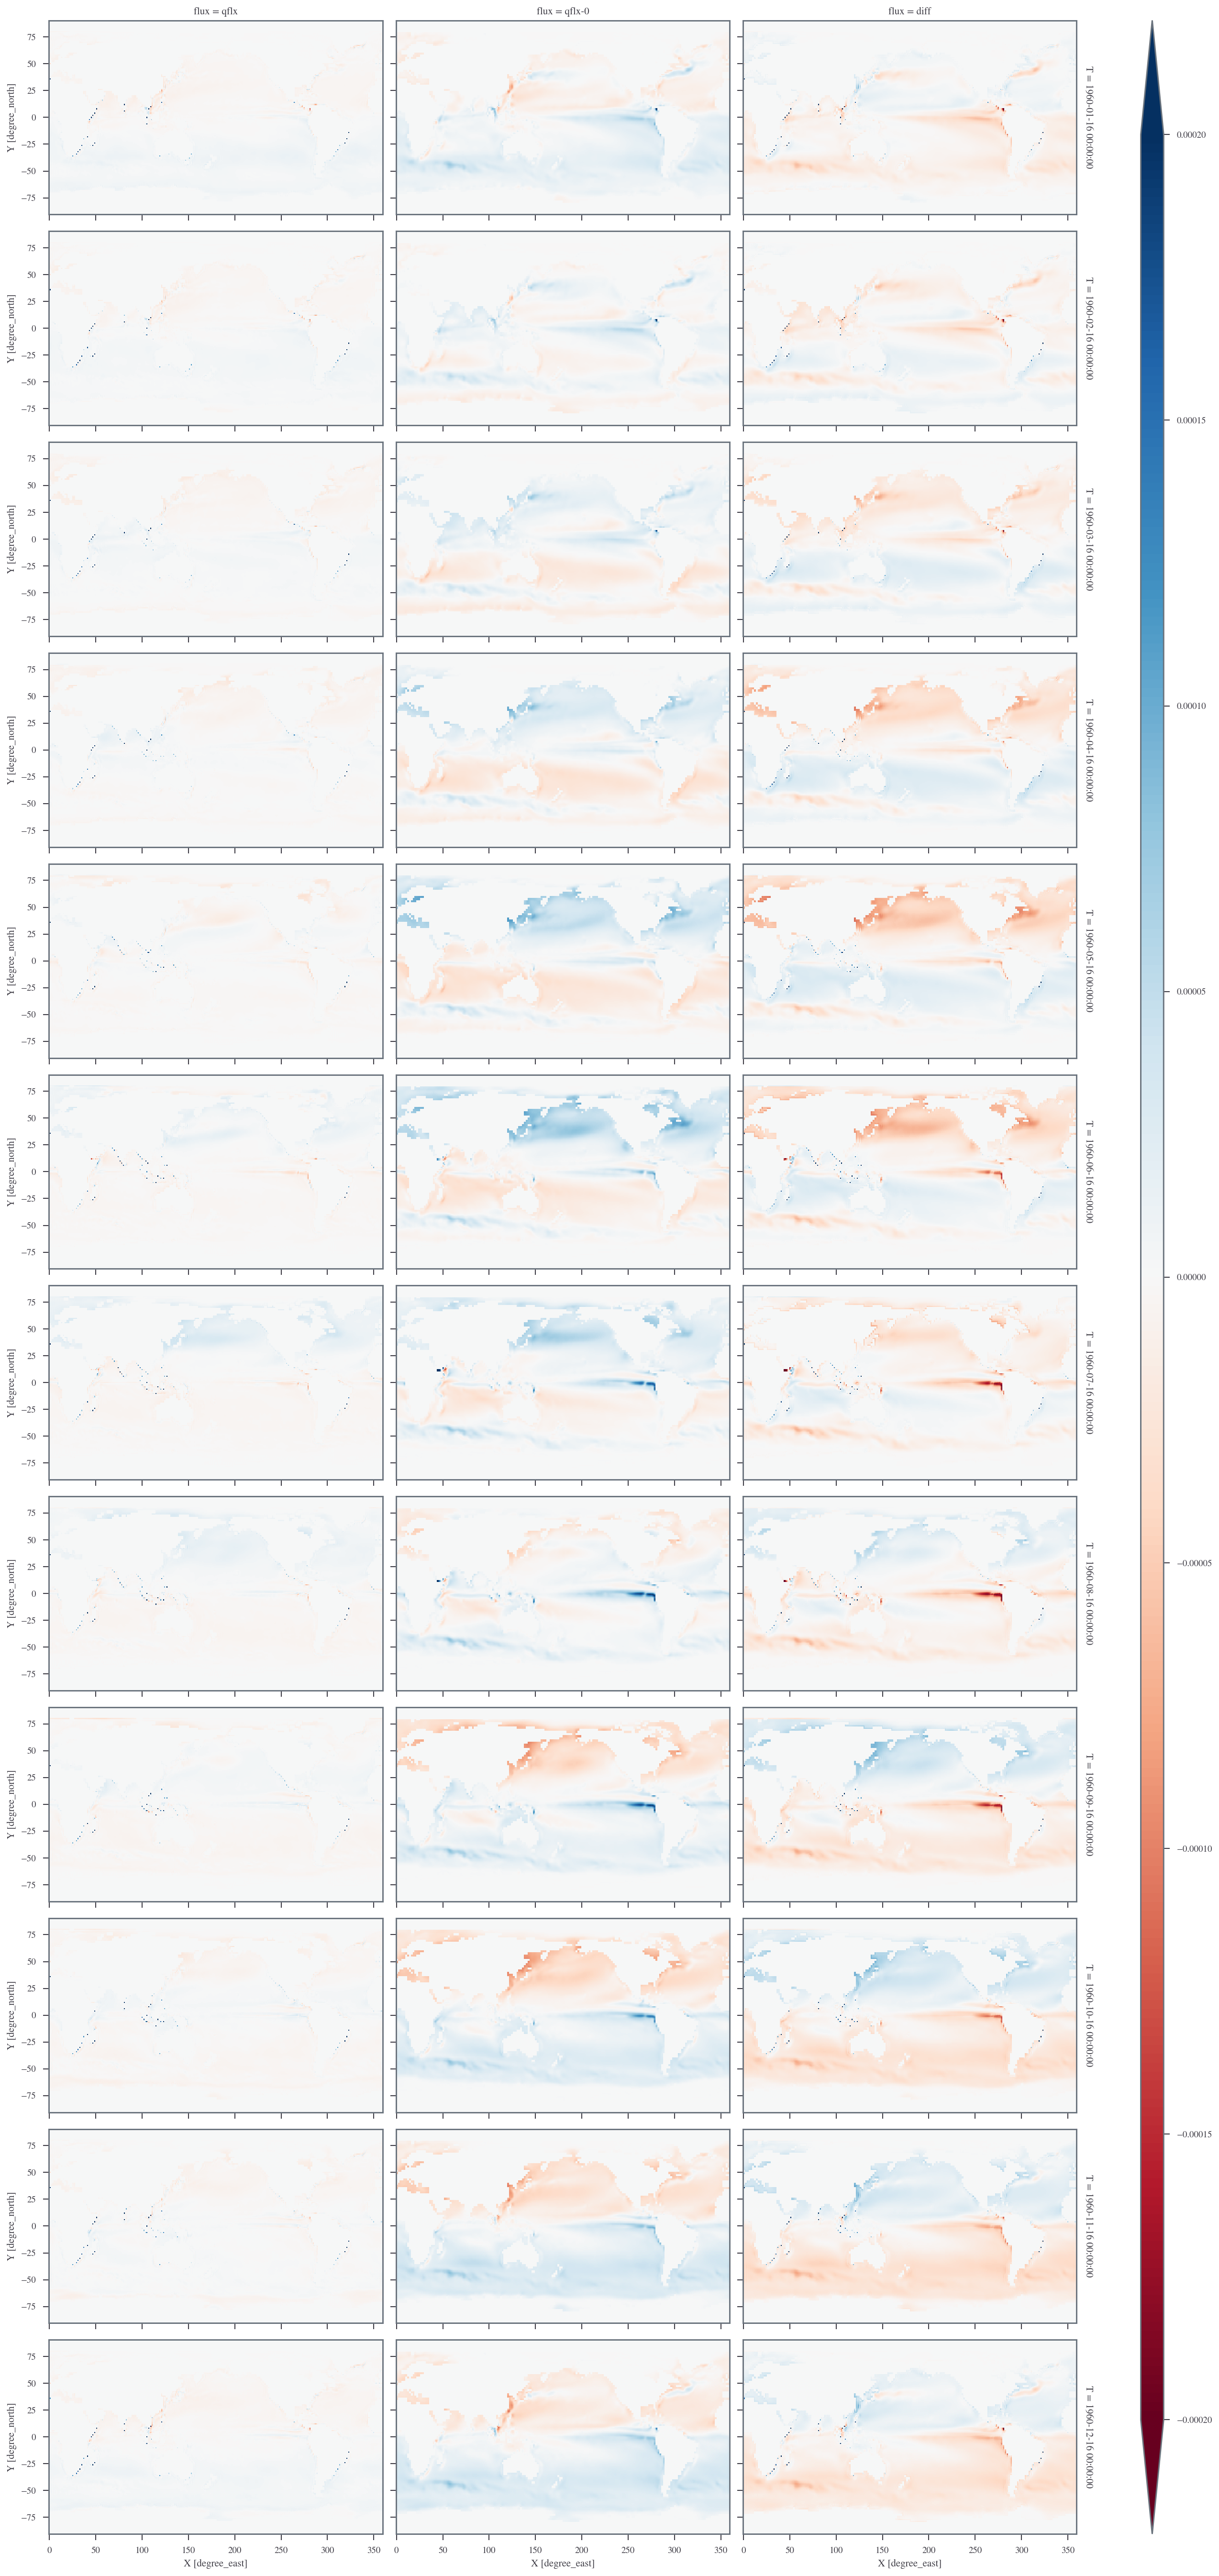

In [68]:
da.plot(col="flux", row="T", vmin=vmin, vmax=vmax, cmap="RdBu", aspect=2, cbar_kwargs={"shrink": 1, "aspect": 100})

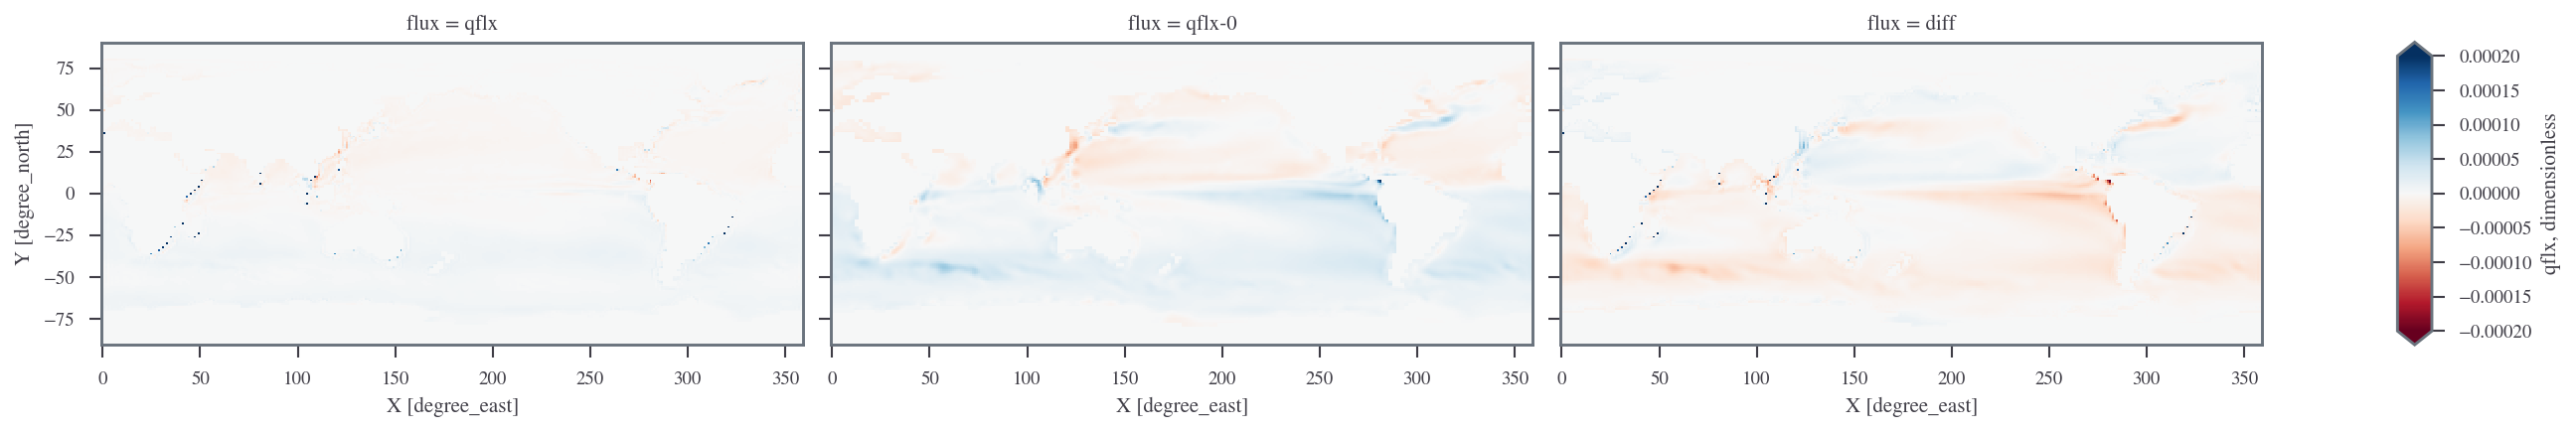

In [73]:
da.isel(T=0).plot(
    col="flux",
    vmin=vmin,
    vmax=vmax,
    cmap="RdBu",
    aspect=2,
    cbar_kwargs={"shrink": 1, "aspect": 8, "label": "qflx, dimensionless"},
)

Text(0.5, 1.03, '1960-01-16')

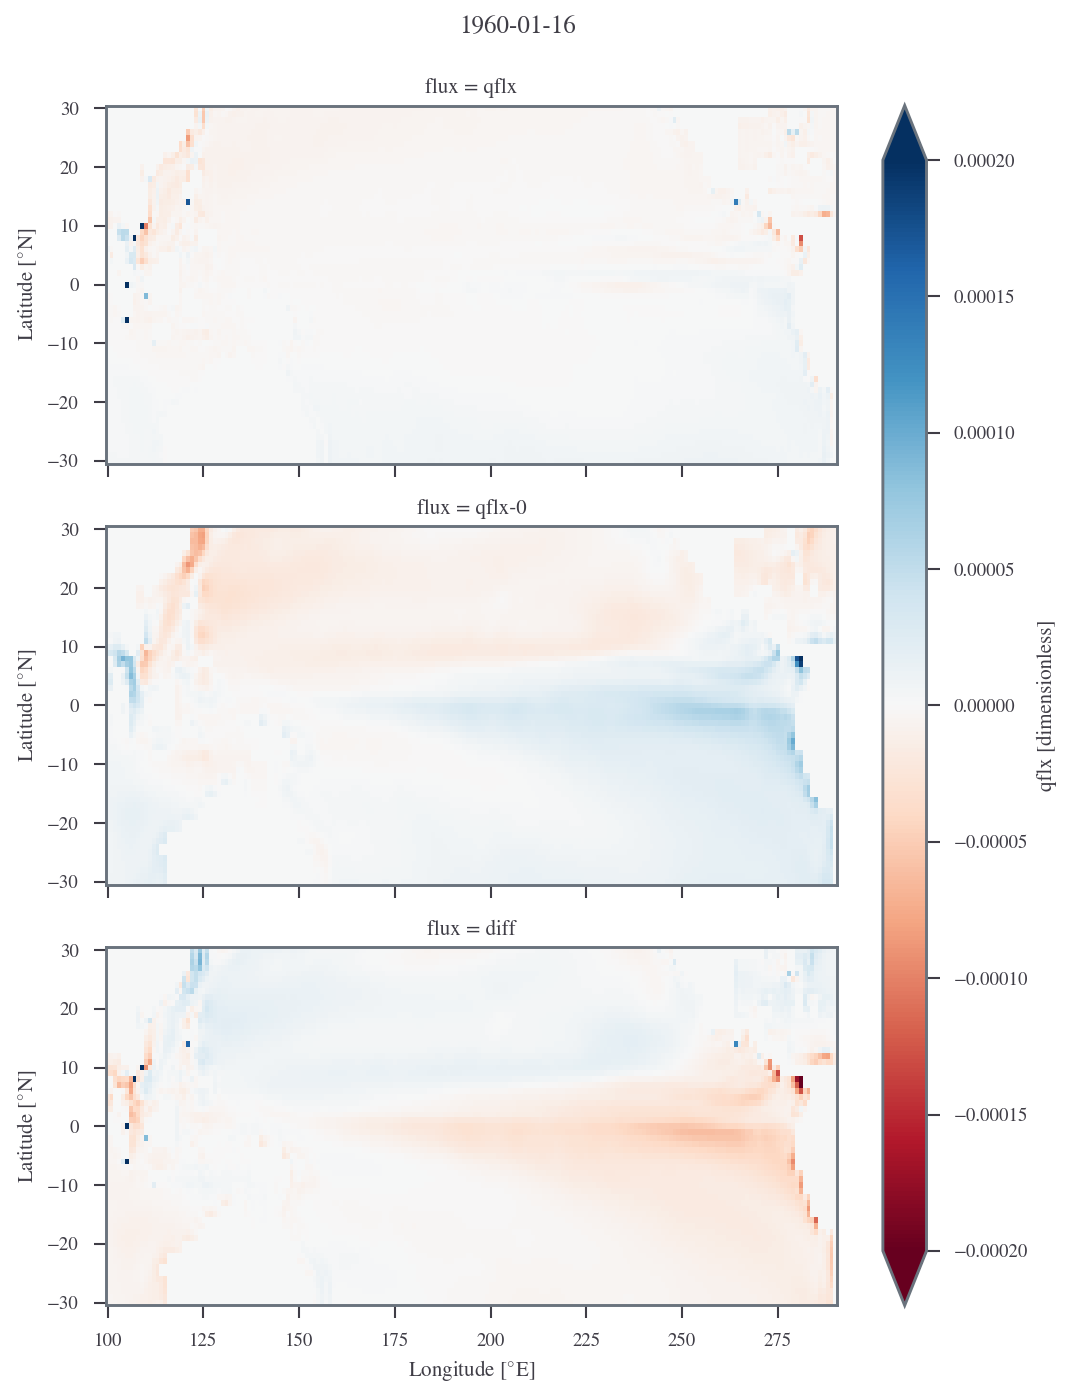

In [101]:
da.X.attrs["units"] = r"$^{\circ}$E"
da.Y.attrs["units"] = r"$^{\circ}$N"
da.Y.attrs["long_name"] = "Latitude"
da.X.attrs["long_name"] = "Longitude"

items = (
    da.isel(T=0)
    .sel(X=slice(100, 290), Y=slice(-30, 30))
    .plot(
        row="flux",
        vmin=vmin,
        vmax=vmax,
        cmap="RdBu",
        aspect=2,
        cbar_kwargs={"shrink": 1, "aspect": 25, "label": "qflx [dimensionless]"},
    )
)
plt.suptitle(da.coords["T"].values[0].strftime()[0:10], y=1.03)

In [81]:
items

In [85]:
da.T.values

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [90]:
print(da.coords['T'].values[0])

1960-01-16 00:00:00


In [114]:
from src.visualisation.ani import animate_diff

In [115]:
animate_diff()

/home/users/sithom/seager19/gifs/diff-output.gif: 100%|██████████| 12/12 [00:06<00:00,  1.85it/s]


Video /home/users/sithom/seager19/gifs/diff-output.gif made.
'animate_diff'  10.21538 s 



![wignerfunction](gifs/diff-output.gif)
